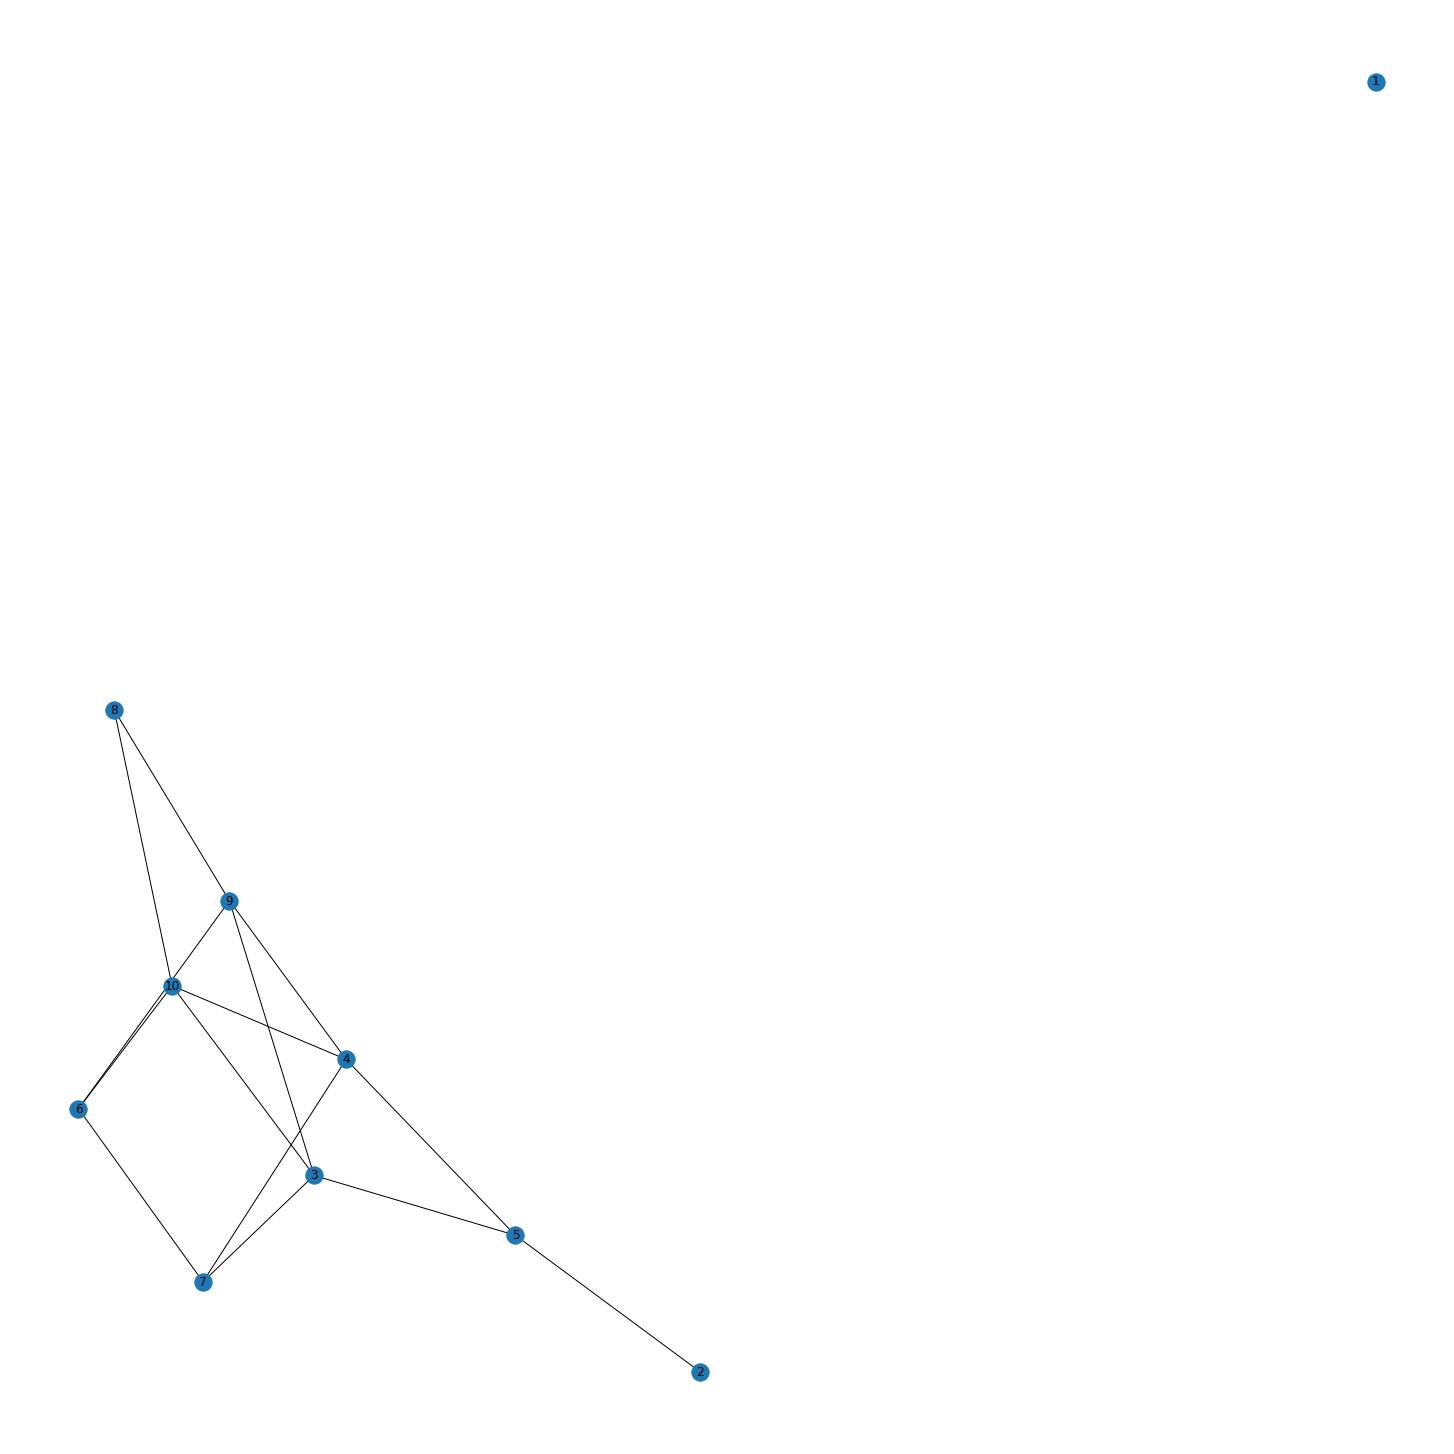


<-------------------------------Most important Tweet according to Degree Centrality by Time------------------------------->

Quake wake-up call for govt, need better building tech: Expert #Earthquake #Nepal #India http://t.co/85dhBJ2aES http://t.co/Q9m9eLs1ye 


<----------------------------Most important Tweet according to Eigen Vector Centrality by Time---------------------------->

Quake wake-up call for govt, need better building tech: Expert #Earthquake #Nepal #India http://t.co/85dhBJ2aES http://t.co/Q9m9eLs1ye 


<--------------------------------Most important Tweet according to Katz Centrality by Time-------------------------------->

Quake wake-up call for govt, need better building tech: Expert #Earthquake #Nepal #India http://t.co/85dhBJ2aES http://t.co/Q9m9eLs1ye 


<------------------------------Most important Tweet according to Closeness Centrality by Time------------------------------>

Quake wake-up call for govt, need better building tech: Expert #Earthquake #Nepal #I

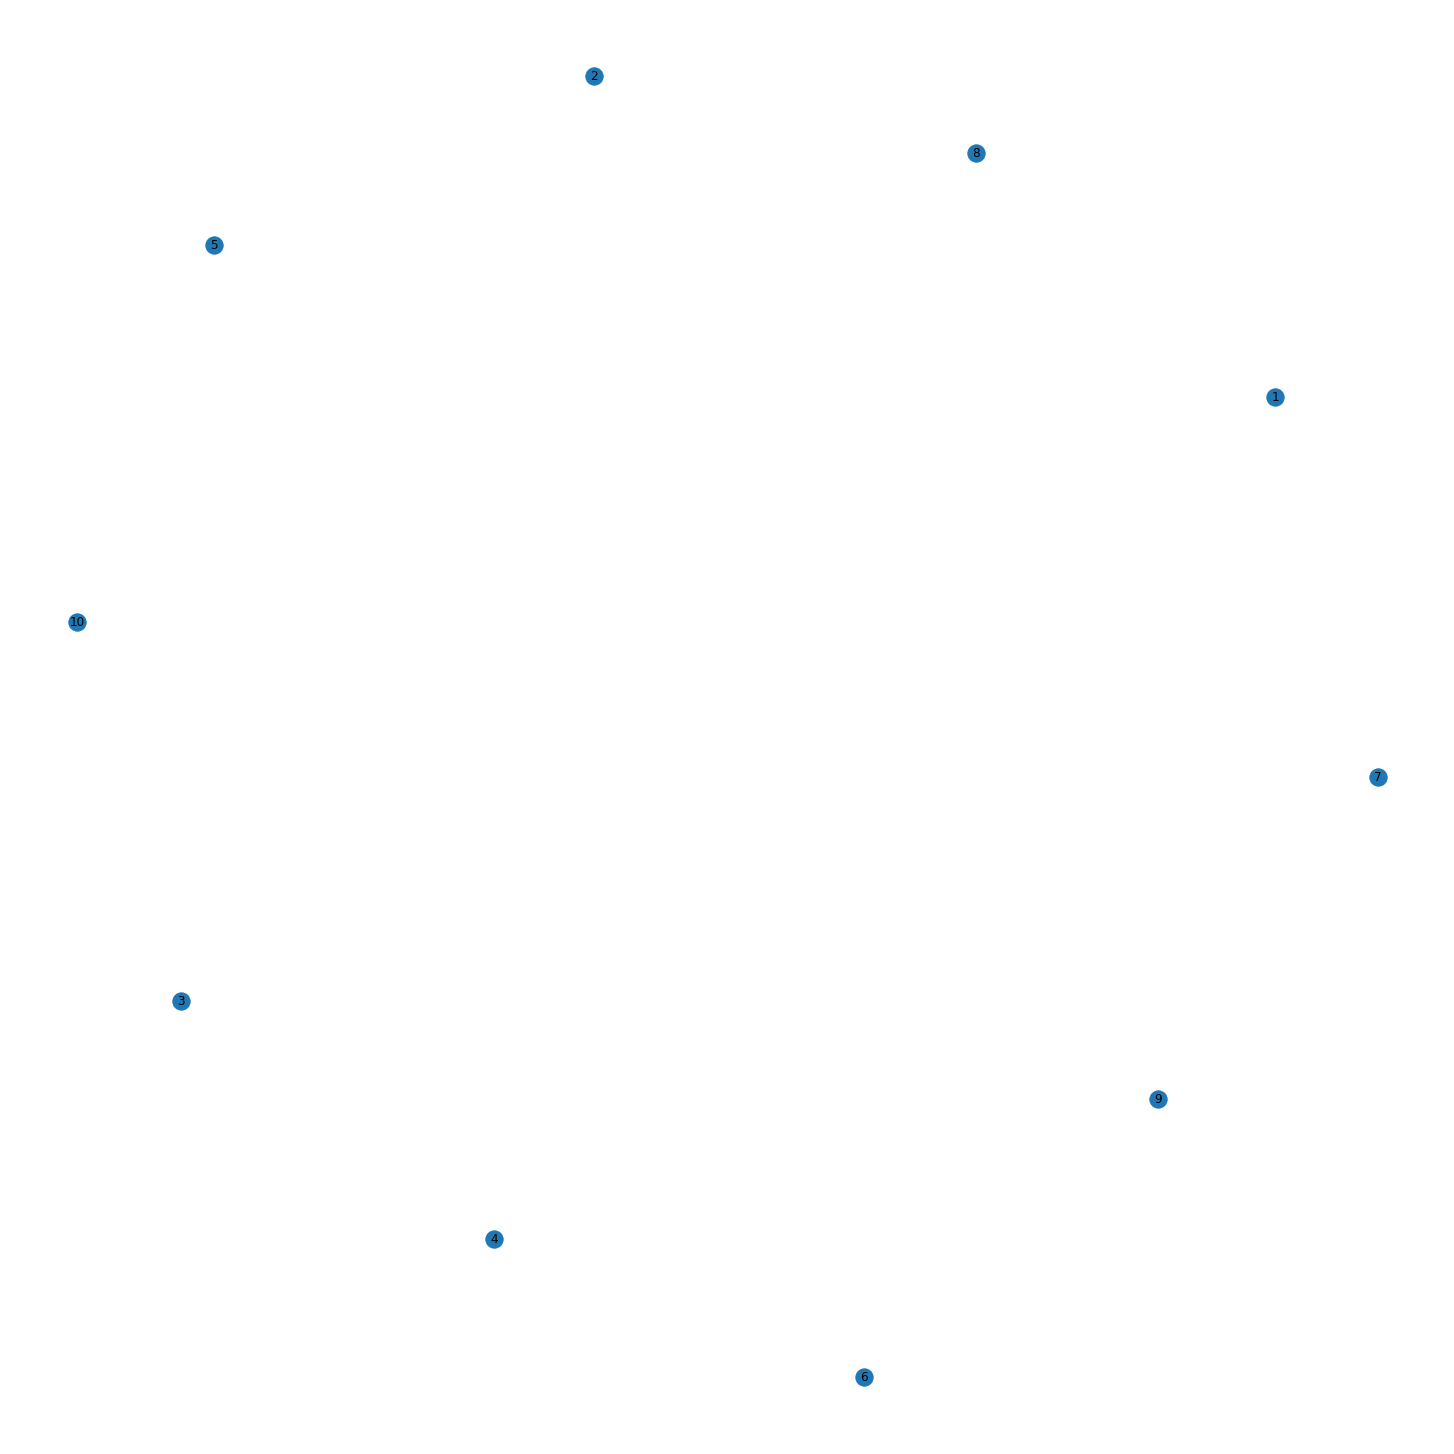


<-------------------------------Most important Tweet according to Degree Centrality by Text------------------------------->

India committed in aid to Nepal: President Pranab Mukherjee: President Pranab Mukherjee… http://t.co/NeP9Pb9l0M SPS® 


<----------------------------Most important Tweet according to Eigen Vector Centrality by Text---------------------------->

RT @iamamkay: need all out support @nytimes: Nepal quake had an  magnitude of 7.9 and shook near its capital
http://t.co/ZXFozn0oY0 http://… 


<---------------------------------Most important Tweet according to Katz Centrality by Text-------------------------------->

India committed in aid to Nepal: President Pranab Mukherjee: President Pranab Mukherjee… http://t.co/NeP9Pb9l0M SPS® 


<------------------------------Most important Tweet according to Closeness Centrality by Text------------------------------>

India committed in aid to Nepal: President Pranab Mukherjee: President Pranab Mukherjee… http://t.co/NeP9Pb9l0M S

In [5]:
#Please ensure all packages are installed
import json_lines
from datetime import datetime
from datetime import timedelta
import re, string, unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import numpy as np

ntweet = 10 #No. of tweets to take from file. Very large values of this will cause program to run slow.
t = [] #Storing Time data
txt = [] #Storing Text data
new_txt = [] #Storing processed Text
GT = nx.Graph() #Time difference graph
gt = nx.Graph() #Text graph
mapping = {} #List to store renaming Time graph nodes
mappings = {} #List to store renaming Time graph nodes

#Reading file
with open('nepal-quake-2015-tweets.jsonl', 'r') as f: 
    for item in json_lines.reader(f):
        chop = item['created_at']
        l = str(item['text'])
        txt.append(l) #Creating Text list
        dt = datetime.strptime(chop[4:-11], '%b %d %H:%M:%S')
        t.append(dt) #Creating Time list

#Preprocessing Text and Selecting Tweets within 15 to 60 minutes
for i in range(ntweet): 
    tu = re.sub(r"http\S+", "", txt[i])
    new_sentp = re.sub(r'[^\w\s]', '', tu)
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(new_sentp)
    new_sentence =[]
    GT.add_node(t[i])
    ll = {t[i]: i+1}
    for j in range((i+1),ntweet):
        diff=t[i]-t[j]
        if (diff.days == 0) & (diff.seconds >= 900) & (diff.seconds <= 3600):
           GT.add_edge(t[i],t[j])
    for w in  word_tokens:
        if w not in stop_words:
           new_sentence.append(w)
    new_sentence = ' '.join(new_sentence)
    new_txt.append(new_sentence.lower()) #Processed text to string list
    mapping.update(ll)

#Calculating Cosine Similarity for Text graph and selecting those with Cosine value greater than 0.65
for i in range(ntweet):
    gt.add_node(new_txt[i])
    ll = {new_txt[i]: i+1}
    Xlist = word_tokenize(new_txt[i]) 
    for j in range((i+1), ntweet):
        Ylist = word_tokenize(new_txt[j])
        l1 =[]
        l2 =[]
        rvector = list(set(Xlist) | set(Ylist))   
        for w in rvector: 
            if w in Xlist:
               l1.append(1)
            else: 
                 l1.append(0) 
            if w in Ylist:
               l2.append(1) 
            else: 
               l2.append(0) 
        c = 0
        for k in range(len(rvector)): 
            c+= l1[k]*l2[k] 
            cosine = c / float((sum(l1)*sum(l2))**0.5) 
        if cosine >= 0.65:
           gt.add_edge(new_txt[i],new_txt[j])
    mappings.update(ll)

#Relabelling nodes and drawing Time graph
HT = nx.relabel_nodes(GT, mapping)
pos = nx.spring_layout(HT, k=0.3*1/np.sqrt(len(HT.nodes())),iterations = 50)
plt.figure(3, figsize=(20,20))
nx.draw(HT,with_labels = True, copy = True)
plt.show()

#Finding Centralities for Time graph
dc = nx.degree_centrality(HT)
ec = nx.eigenvector_centrality_numpy(HT)
kc = nx.katz_centrality_numpy(HT)
cc = nx.closeness_centrality(HT)
bc = nx.betweenness_centrality(HT)

#Finding top 10 nodes Time graph
t10dct = heapq.nlargest(10, dc, key=dc.get)
t10ect = heapq.nlargest(10, ec, key=ec.get)
t10kct = heapq.nlargest(10, kc, key=kc.get)
t10cct = heapq.nlargest(10, dc, key=cc.get)
t10bct = heapq.nlargest(10, bc, key=bc.get)

#Printing important nodes in Time graph
print('\n<-------------------------------Most important Tweet according to Degree Centrality by Time------------------------------->\n')
print(txt[max(dc, key=dc.get)],'\n')
print('\n<----------------------------Most important Tweet according to Eigen Vector Centrality by Time---------------------------->\n')
print(txt[max(ec, key=ec.get)],'\n')
print('\n<--------------------------------Most important Tweet according to Katz Centrality by Time-------------------------------->\n')
print(txt[max(kc, key=kc.get)],'\n')
print('\n<------------------------------Most important Tweet according to Closeness Centrality by Time------------------------------>\n')
print(txt[max(cc, key=cc.get)],'\n')
print('\n<-----------------------------Most important Tweet according to Betweenness Centrality by Time----------------------------->\n')
print(txt[max(bc, key=bc.get)],'\n')

#Relabelling nodes and drawing Text graph
ht = nx.relabel_nodes(gt, mappings)
pos = nx.spring_layout(ht, k=0.3*1/np.sqrt(len(HT.nodes())),iterations = 50)
plt.figure(3, figsize=(20,20))
nx.draw(ht,with_labels=True, copy=True)
plt.show()

#Finding Centralities for Text graph
dc = nx.degree_centrality(ht)
ec = nx.eigenvector_centrality_numpy(ht)
kc = nx.katz_centrality_numpy(ht)
cc = nx.closeness_centrality(ht)
bc = nx.betweenness_centrality(ht)

#Finding top 10 nodes in Text graph
t10dctx = heapq.nlargest(10, dc, key=dc.get)
t10ectx = heapq.nlargest(10, ec, key=ec.get)
t10kctx = heapq.nlargest(10, kc, key=kc.get)
t10cctx = heapq.nlargest(10, dc, key=cc.get)
t10bctx = heapq.nlargest(10, bc, key=bc.get)

#Printing important nodes in Time graph
print('\n<-------------------------------Most important Tweet according to Degree Centrality by Text------------------------------->\n')
print(txt[max(dc, key=dc.get)],'\n')
print('\n<----------------------------Most important Tweet according to Eigen Vector Centrality by Text---------------------------->\n')
print(txt[max(ec, key=ec.get)],'\n')
print('\n<---------------------------------Most important Tweet according to Katz Centrality by Text-------------------------------->\n')
print(txt[max(kc, key=kc.get)],'\n')
print('\n<------------------------------Most important Tweet according to Closeness Centrality by Text------------------------------>\n')
print(txt[max(cc, key=cc.get)],'\n')
print('\n<-----------------------------Most important Tweet according to Betweenness Centrality by Text----------------------------->\n')
print(txt[max(bc, key=bc.get)],'\n \n')

#Checking for overlapping in both sets of top 10 nodes
print('<------------------------------------------Overlapping Tweets for Time and Text Graph----------------------------------------->\n')
intsectdc = [k for k in t10dct if k in t10dctx]
intsectec = [k for k in t10ect if k in t10ectx]
intsectkc = [k for k in t10kct if k in t10kctx]
intsectcc = [k for k in t10cct if k in t10cctx]
intsectbc = [k for k in t10bct if k in t10bctx]

#Printing Overlapped Tweets in Time and Text graph
if len(intsectdc) == 0:
       print('No overlapping node between the Time and Text Graph for Degree Centrality')
else:
    print('Overlapping node between the Time and Text Graph for Degree Centrality----------------------------------------------------->')
    for i in range(len(intsectdc)):
        print(txt[i])
print('\n')      
if len(intsectec) == 0:
       print('No overlapping node between the Time and Text Graph for Eigen Vector Centrality')
else:
    print('Overlapping node between the Time and Text Graph for Eigen Vector Centrality-------------------------------------------------->')
    for i in range(len(intsectec)):
        print(txt[i])
print('\n')
if len(intsectkc) == 0:
       print('No overlapping node between the Time and Text Graph for Katz Centrality')
else:
    print('Overlapping node between the Time and Text Graph for Katz Centrality------------------------------------------------------->')
    for i in range(len(intsectkc)):
        print(txt[i])
print('\n')    
if len(intsectcc) == 0:
       print('No overlapping node between the Time and Text Graph for Closeness Centrality')
else:
    print('Overlapping node between the Time and Text Graph for Closeness Centrality-------------------------------------------------->')
    for i in range(len(intsectcc)):
        print(txt[i])
print('\n')             
if len(intsectbc) == 0:
       print('No overlapping node between the Time and Text Graph for Betweenness Centrality')
else:
    print('Overlapping node between the Time and Text Graph for Betweenness Centrality-------------------------------------------------->')
    for i in range(len(intsectbc)):
        print(txt[i])